<a href="https://colab.research.google.com/github/Sankha1998/machine_learning/blob/master/Decision_Tree_Task_2(Decision_Boundary_on_Iris_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

k = []
k.extend(df['Species'].values)
e = le.fit_transform(k)

df['Species'] = e

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [5]:
df.drop(columns='Id',axis=1,inplace=True)


In [6]:
X=df.iloc[:,[0,2]]

In [7]:
y = df.iloc[:,4]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
cnn=DecisionTreeClassifier(max_depth=2)

cnn.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:

a = np.arange(start = X_train[:,0].min()-1, stop = X_train[:,0].max()+1, step = 0.01)
b = np.arange(start = X_train[:,1].min()-1, stop = X_train[:,1].max()+1, step = 0.01)
print(a.shape,b.shape)

(619,) (535,)


In [14]:
XX,YY = np.meshgrid(a,b)

In [15]:
data = np.array([XX.ravel(),YY.ravel()]).T
labels=cnn.predict(data)

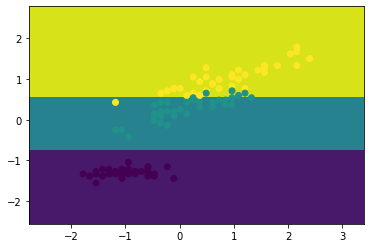

In [16]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)